In [1]:
library(countrycode)
library(ggplot2)
library(cowplot)
library(reshape2)
library(geojsonR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Load Data

In [2]:
mean_year_in_school_df = read.csv('data/mean_years_in_school_women_15_to_24_years.csv', check.names = 'FALSE')
happiness_score_df = read.csv('data/hapiscore_whr.csv', check.names = 'FALSE')

In [3]:
mean_year_columns_to_drop <- c("1970","1971","1972","1973","1974","1975","1976","1977","1978","1979", "1980", "1981", 
          "1982","1983","1984","1985","1986","1987","1988","1989","1990","1991", "1992","1992",
         "1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004")

happines_columns_to_drop <- c("2016","2017","2018","2019","2020","2021","2022")


years_considered = c("2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015")

In [4]:
mean_year_in_school_df = mean_year_in_school_df[,!(names(mean_year_in_school_df) %in% mean_year_columns_to_drop)]
happiness_score_df = happiness_score_df[,!(names(happiness_score_df) %in% happines_columns_to_drop)]

In [5]:
head(mean_year_in_school_df)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,1.55,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
2,Angola,4.64,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00
3,Albania,10.00,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
4,Andorra,14.90,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
5,UAE,11.20,11.40,11.60,11.80,12.00,12.20,12.30,12.50,12.70,12.80,13.00
6,Argentina,11.30,11.50,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80


In [6]:
head(happiness_score_df)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,NA,NA,NA,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8
2,Angola,NA,NA,NA,NA,NA,NA,55.9,43.6,39.4,38.0,NA
3,Albania,NA,NA,46.3,NA,54.9,52.7,58.7,55.1,45.5,48.1,46.1
4,UAE,NA,67.3,NA,NA,68.7,71.0,71.2,72.2,66.2,65.4,65.7
5,Argentina,NA,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0
6,Armenia,NA,42.9,48.8,46.5,41.8,43.7,42.6,43.2,42.8,44.5,43.5


In [7]:
summary(mean_year_in_school_df)

   country               2005             2006             2007       
 Length:188         Min.   : 1.310   Min.   : 1.350   Min.   : 1.390  
 Class :character   1st Qu.: 6.268   1st Qu.: 6.418   1st Qu.: 6.565  
 Mode  :character   Median : 9.635   Median : 9.800   Median : 9.960  
                    Mean   : 8.869   Mean   : 9.013   Mean   : 9.155  
                    3rd Qu.:11.300   3rd Qu.:11.500   3rd Qu.:11.625  
                    Max.   :14.900   Max.   :15.000   Max.   :15.100  
      2008             2009             2010             2011       
 Min.   : 1.440   Min.   : 1.480   Min.   : 1.530   Min.   : 1.580  
 1st Qu.: 6.715   1st Qu.: 6.865   1st Qu.: 7.018   1st Qu.: 7.175  
 Median :10.100   Median :10.300   Median :10.400   Median :10.600  
 Mean   : 9.303   Mean   : 9.447   Mean   : 9.594   Mean   : 9.741  
 3rd Qu.:11.800   3rd Qu.:12.000   3rd Qu.:12.125   3rd Qu.:12.300  
 Max.   :15.300   Max.   :15.400   Max.   :15.500   Max.   :15.600  
      2012          

In [8]:
summary(happiness_score_df)

   country               2005            2006            2007      
 Length:163         Min.   :47.20   Min.   :32.00   Min.   :32.80  
 Class :character   1st Qu.:55.40   1st Qu.:44.60   1st Qu.:46.70  
 Mode  :character   Median :66.20   Median :50.80   Median :52.20  
                    Mean   :64.47   Mean   :51.97   Mean   :54.21  
                    3rd Qu.:71.60   3rd Qu.:59.50   3rd Qu.:61.40  
                    Max.   :80.20   Max.   :76.70   Max.   :78.30  
                    NA's   :136     NA's   :74      NA's   :62     
      2008            2009            2010            2011      
 Min.   :28.10   Min.   :34.10   Min.   :32.30   Min.   :29.40  
 1st Qu.:46.00   1st Qu.:46.55   1st Qu.:46.20   1st Qu.:46.95  
 Median :51.70   Median :53.60   Median :54.75   Median :52.50  
 Mean   :54.18   Mean   :54.58   Mean   :55.07   Mean   :54.32  
 3rd Qu.:62.60   3rd Qu.:62.73   3rd Qu.:63.40   3rd Qu.:63.42  
 Max.   :79.70   Max.   :76.80   Max.   :77.70   Max.   :77.90  
 

### Check For Missing Values and Appy Imputation

In [9]:
mean_value_imputation <- function(df){
    df2 <- df                                              # Duplicate data frame
    for(i in 1:ncol(df)) {                                   # Replace NA in all columns
      df2[ , i][is.na(df2[ , i])] <- mean(df2[ , i], na.rm = TRUE)
    } 
    df2
}

In [10]:
print("Mean years in school women 15 -> 24 missing syears_consideredamples count")
print(sum(is.na(mean_year_in_school_df)))
print("Happiness score missing samples count")
print(sum(is.na(happiness_score_df)))

[1] "Mean years in school women 15 -> 24 missing syears_consideredamples count"
[1] 0
[1] "Happiness score missing samples count"
[1] 531


In [11]:
happiness_score_imputated_df = mean_value_imputation(happiness_score_df)

Warning message in mean.default(df2[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”


In [12]:
print("Happiness score missing samples count")
print(sum(is.na(happiness_score_imputated_df)))

[1] "Happiness score missing samples count"
[1] 0


#### Assign Continents

In [13]:
assign_continent <- function(x,output) {
    continent = countrycode(x[1], origin = 'country.name', destination = 'continent')
    continent
}

In [14]:
mean_year_in_school_df$continent = apply(mean_year_in_school_df, 1, assign_continent)
happiness_score_imputated_df$continent = apply(happiness_score_imputated_df,1 , assign_continent)

### Question 1

In [15]:
# Figure scaling
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }

In [16]:
mean_year_in_school_df

country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,continent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,1.55,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13,Asia
Angola,4.64,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00,Africa
Albania,10.00,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70,Europe
Andorra,14.90,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10,Europe
UAE,11.20,11.40,11.60,11.80,12.00,12.20,12.30,12.50,12.70,12.80,13.00,Asia
Argentina,11.30,11.50,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80,Americas
Armenia,10.70,10.80,11.00,11.20,11.30,11.50,11.60,11.80,12.00,12.10,12.30,Asia
Antigua and Barbuda,13.60,13.80,13.90,14.10,14.20,14.30,14.50,14.60,14.70,14.80,15.00,Americas
Australia,13.80,13.90,14.00,14.20,14.30,14.40,14.60,14.70,14.80,14.90,15.10,Oceania


In [17]:
plot_line_graphs <- function(data_long, x_label, y_label, title) {
    grouped_data <- data_long %>%
      group_by(continent, variable) %>%
        summarise(MeanValue = mean(value))
    
    plot <- ggplot(grouped_data, aes(x = variable, y = MeanValue, group = continent, color = continent)) +
      geom_line() +
      geom_point() +
      labs(
        title = title,
        x = x_label,
        y = y_label
      ) +
    theme_minimal()
    plot
}

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


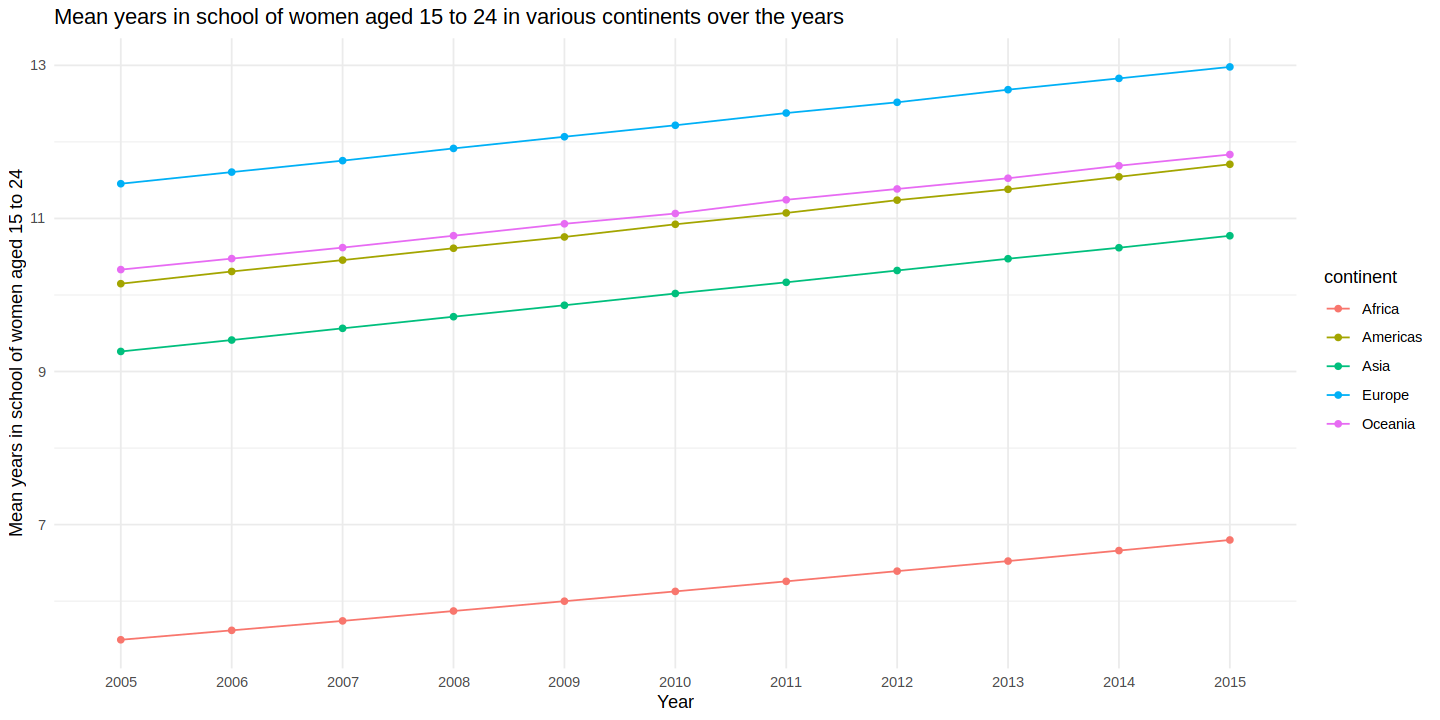

In [18]:
fig(12, 6)
data_long <- melt(mean_year_in_school_df[, c(years_considered, "continent")], id.vars = "continent")
plot_line_graphs(data_long, 
                "Year",
                "Mean years in school of women aged 15 to 24",
                "Mean years in school of women aged 15 to 24 in various continents over the years")

#### Mean Years in School Figure Interpration 

From the above figure women in Africa aged between 15 and 24 years spend the least amount of time in school compared to woman of the same age group in other continents, while European woman of the same age group spend the most amount of time in school. Across all continents the number of years spent in school by women aged 15 to 24 has been increasing linearly in the years 2005 to 2006.

In [19]:
head(happiness_score_imputated_df)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,continent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,64.46667,51.96629,54.21287,37.20000,44.00000,47.60000,38.3,37.8,35.7,31.3,39.80000,Asia
2,Angola,64.46667,51.96629,54.21287,54.17523,54.58482,55.06721,55.9,43.6,39.4,38.0,54.02908,Africa
3,Albania,64.46667,51.96629,46.30000,54.17523,54.90000,52.70000,58.7,55.1,45.5,48.1,46.10000,Europe
4,UAE,64.46667,67.30000,54.21287,54.17523,68.70000,71.00000,71.2,72.2,66.2,65.4,65.70000,Asia
5,Argentina,64.46667,63.10000,60.70000,59.60000,64.20000,64.40000,67.8,64.7,65.8,66.7,67.00000,Americas
6,Armenia,64.46667,42.90000,48.80000,46.50000,41.80000,43.70000,42.6,43.2,42.8,44.5,43.50000,Asia


`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


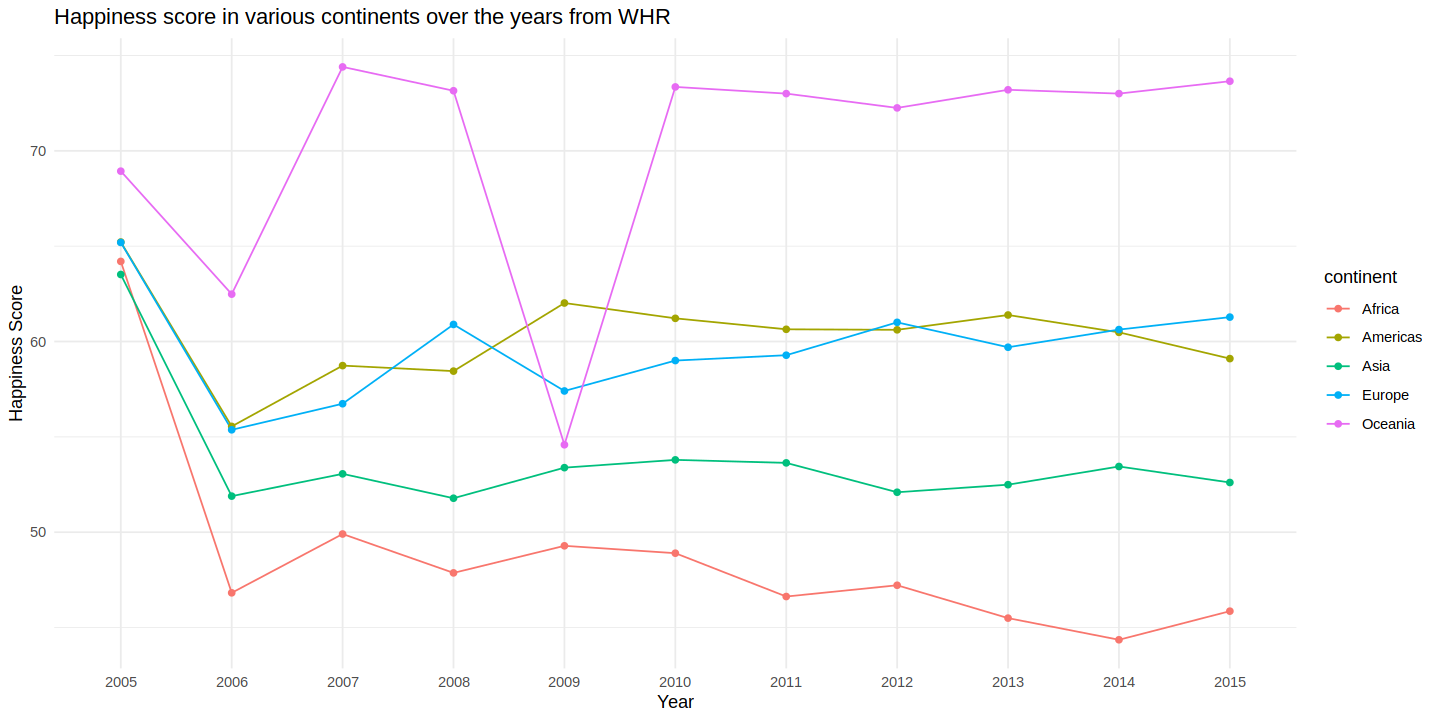

In [20]:
fig(12, 6)
data_long <- melt(happiness_score_imputated_df[, c(years_considered, "continent")], id.vars = "continent")
plot_line_graphs(data_long, 
                "Year",
                "Happiness Score",
                "Happiness score in various continents over the years from WHR")

#### Happiness Score Figure Interpration 

From the figure above , we see there was a sharp decline in the happiness score in Africa from 2005 to 2006 and that people in Africa have consistently had the lowest happiness score amongst other continents since 2006 and has been declining with the lowest value observed in 2014. People in Oceanina normally have the highest happiness score compared to people in other continents. 

### Question 2

In [21]:
head(mean_year_in_school_df)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,continent
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,1.55,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13,Asia
2,Angola,4.64,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00,Africa
3,Albania,10.00,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70,Europe
4,Andorra,14.90,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10,Europe
5,UAE,11.20,11.40,11.60,11.80,12.00,12.20,12.30,12.50,12.70,12.80,13.00,Asia
6,Argentina,11.30,11.50,11.60,11.80,11.90,12.10,12.20,12.40,12.50,12.70,12.80,Americas


In [22]:
mean_year_in_school_africa_df <- mean_year_in_school_df[mean_year_in_school_df$continent == 'Africa', ]
happiness_score_imputated_africa_df <- happiness_score_imputated_df[happiness_score_imputated_df$continent == 'Africa', ]

In [23]:
x = colMeans(mean_year_in_school_africa_df[years_considered])
y = colMeans(happiness_score_imputated_africa_df[years_considered])

`geom_smooth()` using formula = 'y ~ x'


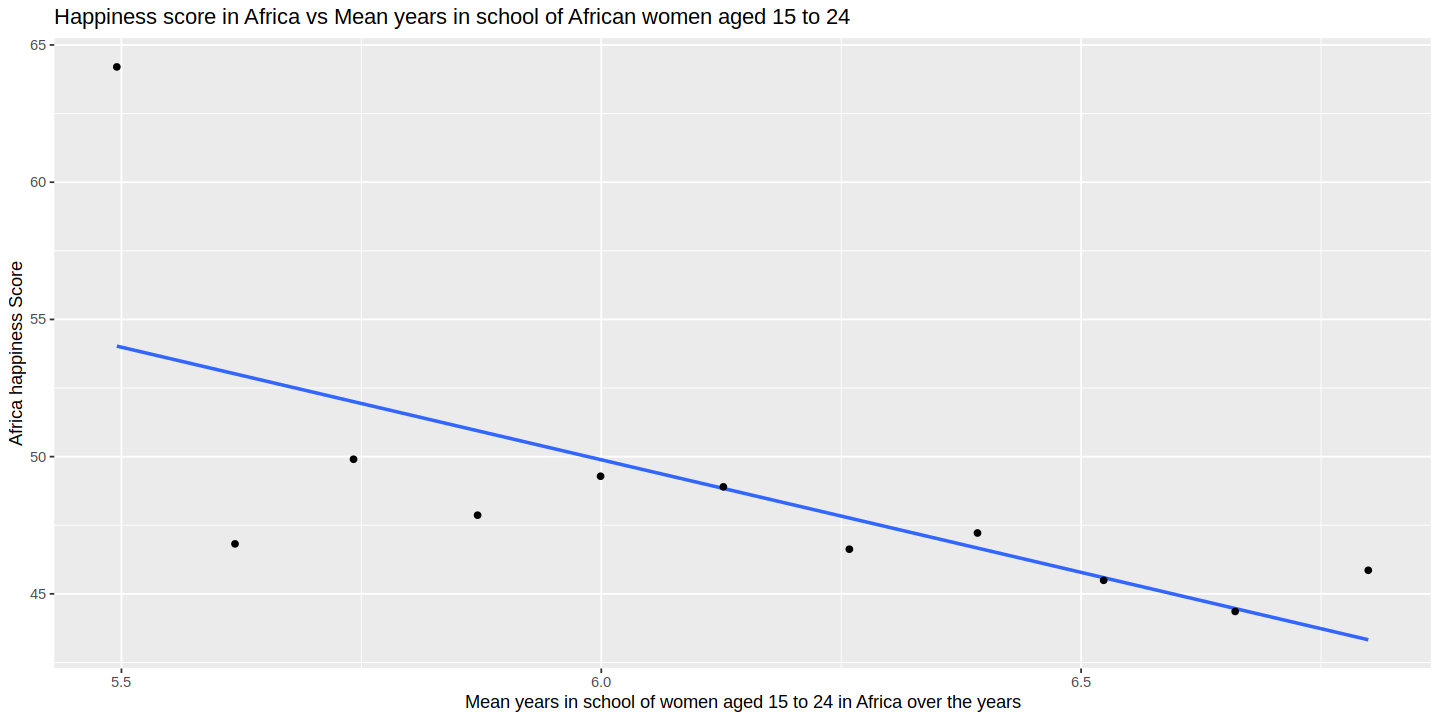

In [24]:
fig(12, 6)
ggplot(data.frame(x,y),aes(x=x, y=y)) +
       geom_smooth(method = "lm", se = FALSE) + 
       geom_point() + labs(x = "Mean years in school of women aged 15 to 24 in Africa over the years", y = "Africa happiness Score", 
       title = "Happiness score in Africa vs Mean years in school of African women aged 15 to 24")

#### Scatter Plot Interpretation

From the plot above the happiness score and mean number of years in school of African women age between 15 and 24 share an inverse proportion relationship. The regression line in the plot shows how the happiness score drops with more time spent in school.

### Question 3

#### African Map

In [25]:
assign_country_code <- function(x,output) {
    code = countrycode(x[1], origin = 'country.name', destination = 'iso3c')
    code
}

In [26]:
africa_geojson = FROM_GeoJson(url_file_string = "data/africa_adm0.geojson")

In [27]:
mean_year_in_school_africa_df$country_code = apply(mean_year_in_school_africa_df, 1, assign_country_code)
happiness_score_imputated_africa_df$country_code = apply(happiness_score_imputated_africa_df, 1, assign_country_code)

In [28]:
## None of the libraries could install :(